## 图像的变化

主要分成 几何变换和 灰度变换

### 几何变换 


#### 图像的放大和缩小

放大 -》上采样，
缩小 -》下采样

图像的放大缩小，本质上是一种映射关系，原图（x,y） 映射到 新图（x',y'）。 
 
**最邻近插值** 

假如放大比例因子是2，那么新图的（i'，j'）对应 原图的（i/2,j/2），如果是小数，就直接取最近的一个值 

比例因子s， 新图的（i,j）对应原图的（i/s,j/s）












In [3]:
import utils
import numpy as np




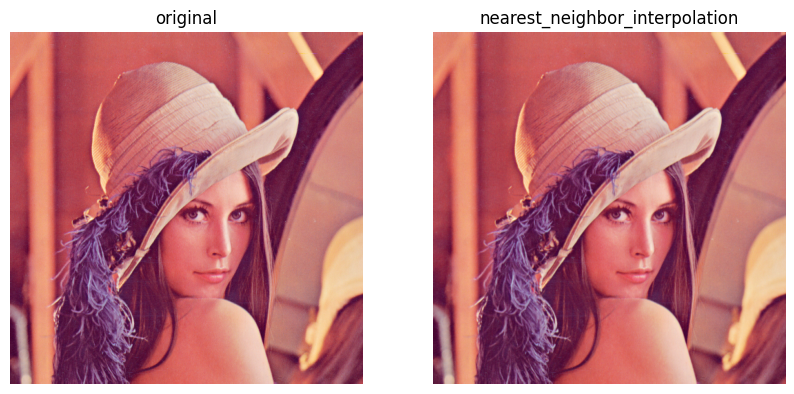

In [8]:
def nearest_neighbor_interpolation(img, scale):
    height, width  = img.shape[:2]
    new_height = int(height * scale)
    new_width = int(width * scale)

    resized_img = np.zeros((new_height,new_width,img.shape[2]),dtype=np.uint8)
    for i in range(new_height):
        for j in range(new_width):
            resized_img[i,j] = img[int(i/scale),int(j/scale)]
    
    return resized_img

img = utils.read_image('../images/Lena.png')
resized_nni = nearest_neighbor_interpolation(img,2)
utils.show_images([img,resized_nni],['original','nearest_neighbor_interpolation'])

    

**双线性插值**
双线性插值，本质上就是 在原图的 四个点之间，找到一个 映射关系。

线性插值：已知两个点（x0,y0），（x1,y1），求 x 在 x0 和 x1 之间的值。

$$y =  \frac{(x - x1)}{(x1 - x0)} y0 + \frac{(x - x0)}{(x1 - x0)} y1$$


双线性插值公式：


$$f(x,y) \approx f(0,0)(1-x)(1-y) + f(1,0)x(1-y) + f(0,1)(1-x)y + f(1,1)xy$$

其中：
- $f(x,y)$ 是目标像素的值
- $f(0,0)$, $f(1,0)$, $f(0,1)$, $f(1,1)$ 是周围四个像素的值
- $x$ 和 $y$ 是目标像素到左上角像素的归一化距离 $(0 \leq x, y < 1)$


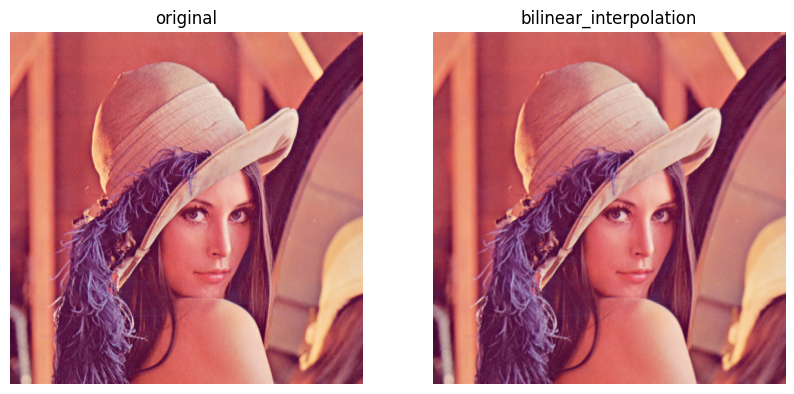

In [9]:
def bilinear_interpolation(img,scale):
    height, width = img.shape[:2]
    new_height = int(height * scale)
    new_width = int(width * scale)

    resized_img = np.zeros((new_height,new_width,img.shape[2]),dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):

            x , y = i / scale, j / scale
            x1, y1 = int(x), int(y) # 左上角

            x2, y2 = min(x1 + 1, height -1) , min(y1+1, width -1) # 右下角

            weight_x, weight_y = x - x1, y -y1

            resized_img[i,j] = img[x1,y1]*(1-weight_x)*(1-weight_y) + img[x1,y2]*weight_x*(1-weight_y) + img[x2,y1]*(1-weight_x)*weight_y + img[x2,y2]*weight_x*weight_y

    return resized_img

img = utils.read_image('../images/Lena.png')
resized_bi = bilinear_interpolation(img,2)
utils.show_images([img,resized_bi],['original','bilinear_interpolation'])



**双三次插值**

双三次插值，本质上就是 在原图的 16 个点之间，找到一个 映射关系。

假设一维的点$(x_1,f(x_1),f'(x_1))$，$(x_2,f(x_2),f'(x_2))$

$f(x_1) = a_0 + a_1x_1 + a_2x_1^2 + a_3x_1^3$

$f(x_2) = a_0 + a_1x_2 + a_2x_2^2 + a_3x_2^3$

$f'(x_1) = a_1 + 2a_2x_1 + 3a_3x_1^2$

$f'(x_2) = a_1 + 2a_2x_2 + 3a_3x_2^2$

二维也是有点$f(x,y)=a_0 + a_1x + a_2y + a_3x^2 + a_4xy + a_5y^2 + a_6x^3 + a_7x^2y + a_8xy^2 + a_9x^3y$

那么一共就有16个系数，需要16个点来求解。



## 灰度变换

### 直方图均值化
原理：
直方图均值化是一种用于增强图像对比度的技术。它的原理是将图像的像素值重新分布，以使像素值的累积分布函数变得更加均匀。这样可以使图像的对比度增强，细节更加清晰。
具体来说，直方图均值化的步骤如下：
计算图像的灰度直方图，即统计每个像素值的出现次数。
2. 根据灰度直方图计算累积分布函数（CDF）。
使用CDF对图像的每个像素值进行映射，将原始像素值替换为新的像素值，使得CDF更加均匀分布。


In [ ]:
def 